In [13]:
#IMPORTS
%run Functions.ipynb
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import time
import category_encoders as ce

from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import Imputer

In [14]:
# Predictions de juguete
n =3263
predictions = np.arange(n)
for i in range(len(predictions)):
    predictions[i]=random.choice([0,1])
    

In [15]:
#CARGA DATA
train = pd.read_csv("Data/train.csv")
to_predict = pd.read_csv("Data/test.csv")


### Completo cosas

In [16]:
train.fillna("Nothing", inplace= True)
keyword_in_text(train)

train.drop(columns=["id"], axis=1,inplace = True)

train.drop(columns=["location"], axis=1,inplace = True)


len_(train)
word_count(train)
train['keyword'] = train['keyword'].str.replace('%',' ')
train['keyword'] = train['keyword'].str.replace('2','')
train['keyword'] = train['keyword'].str.replace('0','')
train.drop(columns=["text"], axis=1,inplace = True)


c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


### Pongo algun Feature

In [17]:
train["Tiene_key_impor"] = (train["keyword"] == "wreckage") | (train["keyword"] == "debris") | (train["keyword"] == "derailment") 
#| (train["keyword"] == "outbreak") | (train["keyword"] == "oil split")\
#| (train["keyword"] == "typhoon") | (train["keyword"] == "suicide bombing") | (train["keyword"] == "suicide bomber")

train["Tiene_key_no_impor"] = (train["keyword"] == "aftershock")

from sklearn.preprocessing import LabelEncoder

# Categorical boolean mask
categorical_feature_mask = train.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = train.columns[categorical_feature_mask].tolist()
categorical_cols

le = LabelEncoder()

# apply le on categorical feature columns
train[categorical_cols] = train[categorical_cols].apply(lambda col: le.fit_transform(col))

In [18]:
categorical_cols

['keyword']

In [19]:
x = train[train.columns.drop("target")]
y = train['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.18)

print(f"Original shapes: X={x.shape} y={y.shape}")
print(f"Train shapes: X={x_train.shape} y={y_train.shape}")
print(f"Test  shapes: X={x_test.shape}  y={y_test.shape}")





Original shapes: X=(7613, 6) y=(7613,)
Train shapes: X=(6242, 6) y=(6242,)
Test  shapes: X=(1371, 6)  y=(1371,)


In [20]:
train.head(10)

,keyword,target,contains_keyword,len,word_count,Tiene_key_impor,Tiene_key_no_impor
0,0,1,False,69,13,False,False
1,0,1,False,38,7,False,False
2,0,1,False,133,22,False,False
3,0,1,False,65,9,False,False
4,0,1,False,88,17,False,False
5,0,1,False,110,18,False,False
6,0,1,False,95,14,False,False
7,0,1,False,59,15,False,False
8,0,1,False,79,12,False,False
9,0,1,False,52,10,False,False


### Fit

In [21]:
k = list(range(2,40))
prueba = pd.DataFrame(k,index=k,columns=["Kactual"])

In [22]:
dists = [
"euclidean",
"manhattan",
"chebyshev"]


knn_best_distance(prueba,dists,x_train,y_train,x_test,y_test)

euclidean --------------------------
con k:  2
Entrenamiento: 82.0570%
Testeo: 66.0102%.
F1 score: 0.4989.
   
con k:  3
Entrenamiento: 82.0250%
Testeo: 66.2290%.
F1 score: 0.5977.
   
con k:  4
Entrenamiento: 77.1708%
Testeo: 67.1043%.
F1 score: 0.5421.
   
con k:  5
Entrenamiento: 77.0266%
Testeo: 66.0102%.
F1 score: 0.5847.
   
con k:  6
Entrenamiento: 74.8798%
Testeo: 66.5937%.
F1 score: 0.5492.
   
con k:  7
Entrenamiento: 74.6075%
Testeo: 65.8643%.
F1 score: 0.5844.
   
con k:  8
Entrenamiento: 73.3899%
Testeo: 66.3749%.
F1 score: 0.5511.
   
con k:  9
Entrenamiento: 73.2458%
Testeo: 65.7185%.
F1 score: 0.5841.
   
con k:  10
Entrenamiento: 72.3005%
Testeo: 65.2079%.
F1 score: 0.5382.
   
con k:  11
Entrenamiento: 71.8360%
Testeo: 65.4996%.
F1 score: 0.5803.
   
con k:  12
Entrenamiento: 71.3073%
Testeo: 64.7702%.
F1 score: 0.5387.
   
con k:  13
Entrenamiento: 70.8747%
Testeo: 64.6244%.
F1 score: 0.5697.
   
con k:  14
Entrenamiento: 70.8907%
Testeo: 64.7702%.
F1 score: 0.5396.


Entrenamiento: 65.8283%
Testeo: 61.4150%.
F1 score: 0.5051.
   
con k:  35
Entrenamiento: 65.9404%
Testeo: 61.1962%.
F1 score: 0.5207.
   
con k:  36
Entrenamiento: 65.3637%
Testeo: 62.0715%.
F1 score: 0.5131.
   
con k:  37
Entrenamiento: 65.6520%
Testeo: 61.4880%.
F1 score: 0.5260.
   
con k:  38
Entrenamiento: 65.0913%
Testeo: 60.9774%.
F1 score: 0.4986.
   
con k:  39
Entrenamiento: 64.9632%
Testeo: 60.8315%.
F1 score: 0.5218.
   


(40, -0.1)

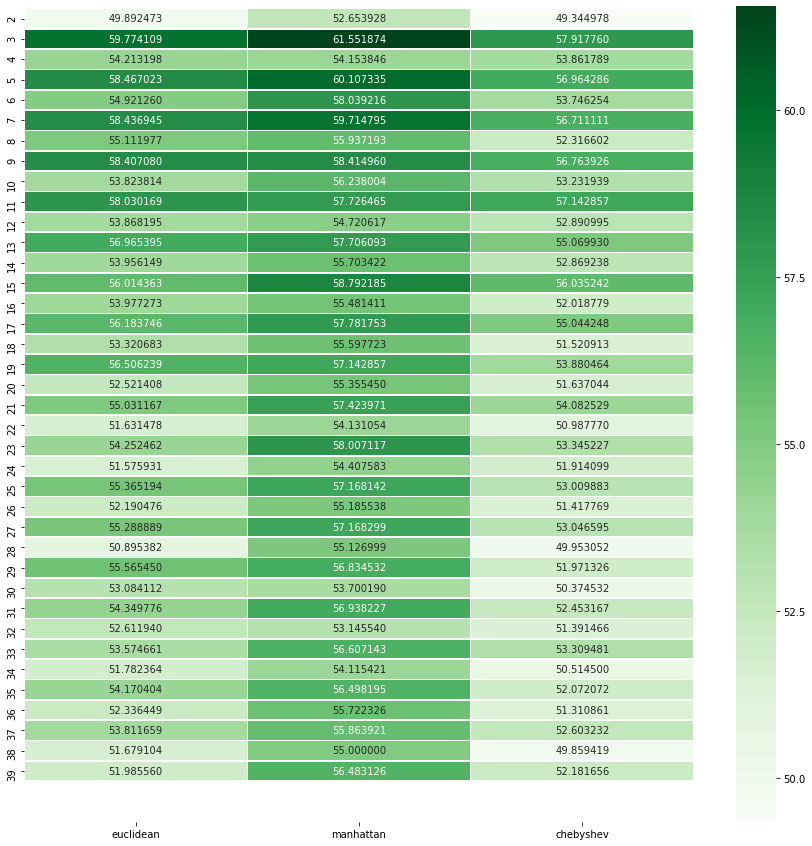

In [23]:
prueba.drop(columns="Kactual",inplace=True)

a= prueba.transform(lambda x: x*100)
plt.figure(figsize=(15, 15))

sns.heatmap(a, annot=True, fmt='.6f', linewidths=.5,cmap="Greens").set_ylim(40,-0.1)

In [24]:
knn = KNeighborsClassifier(n_neighbors =3, metric="manhattan")

knn.fit(x_train, y_train)

res = predecir(knn,x_train,y_train,x_test,y_test)

Entrenamiento: 82.2493%
Testeo: 67.8337%.
F1 score: 0.6155.
   


### Completo Features

In [25]:
to_predict.fillna("Nothing", inplace= True)
keyword_in_text(to_predict)

ids = to_predict["id"]

to_predict.drop(columns=["id"], axis=1,inplace = True)
to_predict.drop(columns=["location"], axis=1,inplace = True)

len_(to_predict)
word_count(to_predict)

to_predict['keyword'] = to_predict['keyword'].str.replace('%',' ')
to_predict['keyword'] = to_predict['keyword'].str.replace('2','')
to_predict['keyword'] = to_predict['keyword'].str.replace('0','')

to_predict.drop(columns=["text"], axis=1,inplace = True)

c:\users\hal9000\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [26]:
to_predict["Tiene_key_impor"] = (to_predict["keyword"] == "wreckage") | (to_predict["keyword"] == "debris")\
| (to_predict["keyword"] == "derailment")
#| (to_predict["keyword"] == "outbreak")\
#| (to_predict["keyword"] == "oil split") | (to_predict["keyword"] == "typhoon") \
#| (to_predict["keyword"] == "suicide bombing") | (to_predict["keyword"] == "suicide bomber")

to_predict["Tiene_key_no_impor"] = (to_predict["keyword"] == "aftershock")

# Categorical boolean mask
categorical_feature_mask = to_predict.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = to_predict.columns[categorical_feature_mask].tolist()
categorical_cols

le = LabelEncoder()

# apply le on categorical feature columns
to_predict[categorical_cols] = to_predict[categorical_cols].apply(lambda col: le.fit_transform(col))

In [27]:
to_predict["Tiene_key_impor"].value_counts()

False    3228
True       35
Name: Tiene_key_impor, dtype: int64

### Resultado

In [30]:
#Resultado de test
knn = KNeighborsClassifier(n_neighbors = 9, metric="manhattan")

#Entreno con todo el dataset
knn.fit(x, y)

#Predigo la data
predict = knn.predict(to_predict)
predict

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

### Guardo Submission

In [31]:
result = submission_output(ids, predict,"KNN v1.32 k=9.csv")
result

,id,target
0,0,0
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
